# Installing the face_recognition library

In [1]:
!pip install face_recognition

# Importing the required Modules

In [2]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
import dlib

# Unzipping the Train and Test folders

In [3]:
!unzip Train.zip
!unzip Test.zip

Archive:  Train.zip
replace Train/Barack_Obama/Barack_Obama_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Train/Barack_Obama/Barack_Obama_1.jpg  
  inflating: Train/Barack_Obama/Barack_Obama_2.jpg  
  inflating: Train/Barack_Obama/Barack_Obama_3.jpg  
  inflating: Train/Bill_Gates/Bill_Gates_1.jpg  
  inflating: Train/Bill_Gates/Bill_Gates_2.jpg  
  inflating: Train/Bill_Gates/Bill_Gates_3.jpg  
  inflating: Train/Elon_Musk/Elon_Musk_1.jpg  
  inflating: Train/Elon_Musk/Elon_Musk_2.jpg  
  inflating: Train/Elon_Musk/Elon_Musk_3.jpg  
Archive:  Test.zip
replace Test/Barack_Obama.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Test/Barack_Obama.jpg   
  inflating: Test/Bill_Gates.jpg     
  inflating: Test/Elon_Musk.jpg      


# Creating a function to read the images and apply a few transformations to it

In [4]:
def read_img(path):   #function to read images and resize them
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500        #setting width to 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))    #resizing the image to the new dimensions

In [5]:
def split_name(file):  #function to split transform the file name
  name = file.split('_')[0] + '_' + file.split('_')[1]
  return name

# Preparing Train data 

In [6]:
known_encodings = []  #list to store encodings for our known images
known_names = []      #list to store file names of images from train set
known_dir = 'Train'

#reading in the images from the 'Train' folder
for folder in os.listdir(known_dir): #iterating through the 'Train' folder which is our known_dir
  for file in os.listdir(os.path.join(known_dir,folder)):     
    img = read_img(os.path.join(known_dir,folder,file))   #calling the 'read_img' function to read and resize the images
    #face_recognition library has a function called face_encodings which generates the encodings for each image
    img_enc = face_recognition.face_encodings(img)[0]    #getting encodings for each image using face_recognition library
    known_encodings.append(img_enc)   #appending to our known_encodings list
    name = split_name(file)
    known_names.append(name) 

# Getting Results by testing on Test set

In [7]:
# Function to detect the face and its landmarks
def facial_features(img):
  img_enc = face_recognition.face_encodings(img)[0]  #getting encodings for test images

  results = face_recognition.compare_faces(known_encodings, img_enc)   #comparing the encodings of the train images to the ones of the test images. Faces that look similar will have similar encodings
  
  face_landmarks_list = face_recognition.face_landmarks(img)
  print(face_landmarks_list)
  
  confidence= face_recognition.face_distance(known_encodings, img_enc)  #getting confidence score as to how sure the model is that, the prediction is correct
  print(confidence)
  idx = np.argmax(confidence)  #'confidence' will be a list of 3 values (since we have 3 possibilities), and we want to get the position/index of the value that has the highest value
  label = known_names[idx]   #using idx and known_names list to get the name of person detected

  label = "Confidence : {:.2f}%".format(confidence[idx] * 100)

  name_check = []
  for i in range(len(results)):
      if results[i]:
          name = known_names[i]
          if name not in name_check:  #to check if the name is already examined once in order to prevent printing of multiple same results 
            name_check.append(name)
          else:
            continue 
          (top, right, bottom, left) = face_recognition.face_locations(img)[0]
          cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)   #drawing a rectangle exactly over the detected face
          cv2.putText(img, name, (left, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255), 1)
          cv2.putText(img, label, (left, bottom+40), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255), 1)
          
          detector = dlib.get_frontal_face_detector()
          predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #using pretrained model

          gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
          faces = detector(gray)
          for face in faces:
            x1 = face.left() # left point
            y1 = face.top() # top point
            x2 = face.right() # right point
            y2 = face.bottom() # bottom point

          landmarks = predictor(image=gray,box=face) #feeding the image to the model
          for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
          cv2_imshow(img)

[{'chin': [(164, 190), (169, 207), (175, 224), (184, 240), (194, 257), (206, 272), (222, 284), (240, 292), (259, 290), (279, 282), (296, 269), (311, 252), (321, 233), (326, 211), (324, 189), (319, 167), (314, 146)], 'left_eyebrow': [(165, 173), (168, 162), (178, 156), (189, 155), (201, 158)], 'right_eyebrow': [(225, 150), (236, 140), (249, 134), (263, 133), (275, 138)], 'nose_bridge': [(216, 166), (219, 178), (221, 191), (223, 205)], 'nose_tip': [(217, 215), (223, 217), (231, 218), (238, 212), (244, 207)], 'left_eye': [(181, 179), (187, 173), (195, 170), (204, 173), (197, 176), (188, 178)], 'right_eye': [(239, 162), (245, 155), (253, 152), (262, 154), (256, 157), (248, 160)], 'top_lip': [(214, 245), (219, 236), (228, 232), (236, 231), (246, 227), (260, 224), (275, 226), (272, 227), (248, 231), (238, 234), (229, 236), (218, 244)], 'bottom_lip': [(275, 226), (267, 242), (255, 252), (244, 256), (235, 258), (224, 255), (214, 245), (218, 244), (232, 248), (241, 247), (251, 243), (272, 227)]

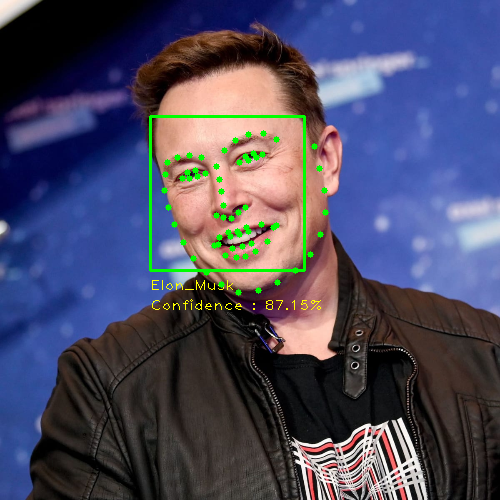

[{'chin': [(189, 115), (190, 133), (193, 150), (196, 167), (201, 184), (210, 198), (222, 211), (236, 221), (253, 223), (270, 218), (283, 207), (296, 193), (305, 179), (310, 163), (313, 146), (314, 130), (315, 114)], 'left_eyebrow': [(201, 109), (208, 100), (219, 96), (231, 96), (243, 99)], 'right_eyebrow': [(263, 99), (274, 95), (286, 95), (297, 99), (303, 108)], 'nose_bridge': [(253, 110), (253, 120), (253, 131), (253, 143)], 'nose_tip': [(237, 149), (245, 151), (253, 153), (261, 150), (268, 148)], 'left_eye': [(215, 113), (222, 110), (230, 109), (236, 113), (230, 114), (222, 114)], 'right_eye': [(270, 113), (277, 109), (284, 109), (291, 113), (284, 114), (277, 113)], 'top_lip': [(221, 168), (231, 163), (244, 162), (253, 163), (262, 162), (274, 162), (284, 166), (280, 167), (262, 166), (253, 167), (244, 166), (224, 169)], 'bottom_lip': [(284, 166), (274, 180), (263, 186), (252, 188), (243, 187), (231, 181), (221, 168), (224, 169), (243, 179), (252, 180), (262, 179), (280, 167)]}]
[0.4

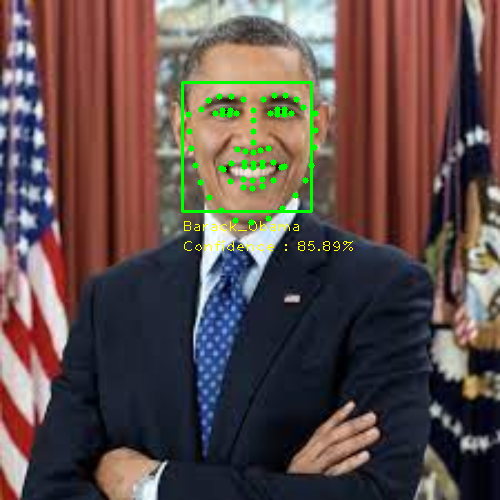

[{'chin': [(132, 230), (140, 264), (148, 295), (160, 323), (179, 348), (206, 368), (238, 384), (270, 393), (301, 390), (325, 385), (341, 366), (354, 343), (363, 317), (369, 291), (371, 265), (371, 240), (369, 214)], 'left_eyebrow': [(178, 215), (195, 198), (218, 188), (244, 184), (268, 188)], 'right_eyebrow': [(304, 184), (320, 177), (338, 173), (355, 173), (366, 184)], 'nose_bridge': [(290, 205), (294, 226), (299, 247), (304, 268)], 'nose_tip': [(274, 282), (287, 285), (301, 289), (311, 283), (319, 277)], 'left_eye': [(207, 223), (221, 212), (236, 208), (248, 218), (237, 222), (222, 225)], 'right_eye': [(315, 211), (327, 199), (342, 196), (350, 205), (343, 210), (330, 211)], 'top_lip': [(245, 320), (270, 315), (288, 311), (299, 312), (309, 309), (322, 312), (335, 316), (330, 316), (310, 316), (299, 317), (288, 317), (252, 320)], 'bottom_lip': [(335, 316), (323, 322), (311, 325), (300, 326), (288, 326), (270, 325), (245, 320), (252, 320), (288, 317), (299, 317), (309, 315), (330, 316)]

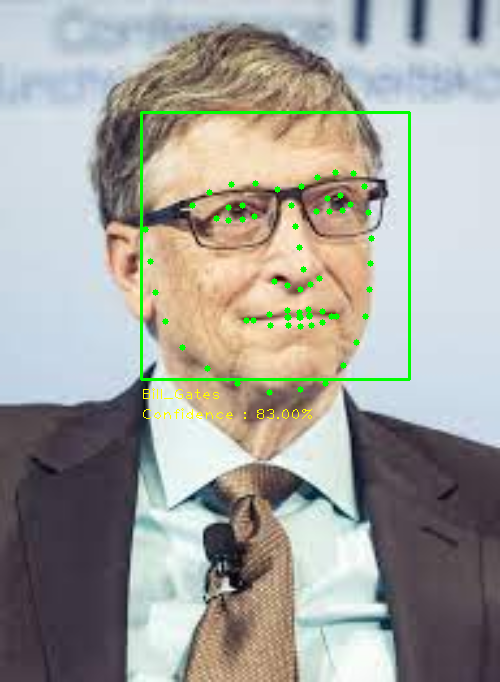

In [8]:
# testing it on the images in the Test set
unknown_dir = 'Test'
#reading in the images from the unknown folder
for file in os.listdir(unknown_dir):
    img = read_img(unknown_dir + '/' + file)  #calling the 'read_img' function to read and resize the images
    facial_features(img)

# Inference
To test images with no faces

In [9]:
test_img2 = read_img('car.jpg')
detector = dlib.get_frontal_face_detector()
detected_faces = detector(test_img2) #returns a list and length of list = 0 implies that no faces were detected 

if len(detected_faces) == 0:
  print('No face detected')

else:
  facial_features(test_img2)

No face detected


We can clearly see that our models is able to distinguish between images having faces and no faces at all